In [1]:
from kymata.datasets.sample import KymataMirror2023Q3Dataset, TVLDeltaInsTC1LoudnessOnlySensorsDataset
from kymata.entities.expression import HexelExpressionSet, SensorExpressionSet
from kymata.plot.color import gradient_color_dict, constant_color_dict
from kymata.plot.plot import expression_plot, legend_display_dict

### Plot Hexel Expression Plots

In [2]:
# We'll create new expression set object and add to it

# For more explanation of saving and loading ExpressionSets, see the demo_save_load.ipynb
expression_data_kymata_mirror: HexelExpressionSet = KymataMirror2023Q3Dataset().to_expressionset()

# print the names of all available transforms in the expressionSet object
print("\n".join(expression_data_kymata_mirror.transforms))

Data root set at /Users/cai/Dox/Work/Kymata lab/Code/kymata-core/kymata-core-data.
Consider setting this as environmental variable KYMATA_DATA_ROOT to ensure it's reused next time.
Hint: $> KYMATA_DATA_ROOT="/Users/cai/Dox/Work/Kymata lab/Code/kymata-core/kymata-core-data"
Local file already exists: /Users/cai/Dox/Work/Kymata lab/Code/kymata-core/kymata-core-data/tutorial_nkg_data/kymata_mirror_Q3_2023/kymata_mirror_Q3_2023_expression_endtable.nkg


/Users/cai/Dox/Work/Kymata lab/Code/kymata-core/kymata/io/nkg.py:231: UserWarning: This file uses an old format. Please consider re-saving the data to avoid future incompatibility.
  warn(


vertical displacement (RH-Th/P/M)
vertical displacement (RH-Ha/P/M)
vertical displacement (LH-Th/P/M)
vertical displacement (LH-Ha/P/M)
vibration detection (RH-Th/P/M)
vibration detection (LH-Th/P/M)
vibration detection (LH-Ha/P/M)
vibration detection (RH-Ha/P/M)
CIECAM02 A
CIECAM02 a
CIELAB a*
CIELAB L
Heeger horizontal position
Heeger horizontal velocity
Heeger horizontal acceleration
Heeger horizontal ME GP1
Heeger horizontal ME GP2
Heeger horizontal ME GP3
Heeger horizontal ME GP4
Horn-Schunck Horizontal Velocity
Horn-Schunck Horizontal Displacement
Horn-Schunck Horizontal Acceleration
Hilbert envelope
TVL loudness (short-term)
TVL loudness (instantaneous)
TVL loudness chan 1 (instantaneous)
TVL loudness chan 2 (instantaneous)
TVL loudness chan 3 (instantaneous)
TVL loudness chan 4 (instantaneous)
TVL loudness chan 5 (instantaneous)
TVL loudness chan 6 (instantaneous)
TVL loudness chan 7 (instantaneous)
TVL loudness chan 8 (instantaneous)
TVL loudness chan 9 (instantaneous)
TVL lou

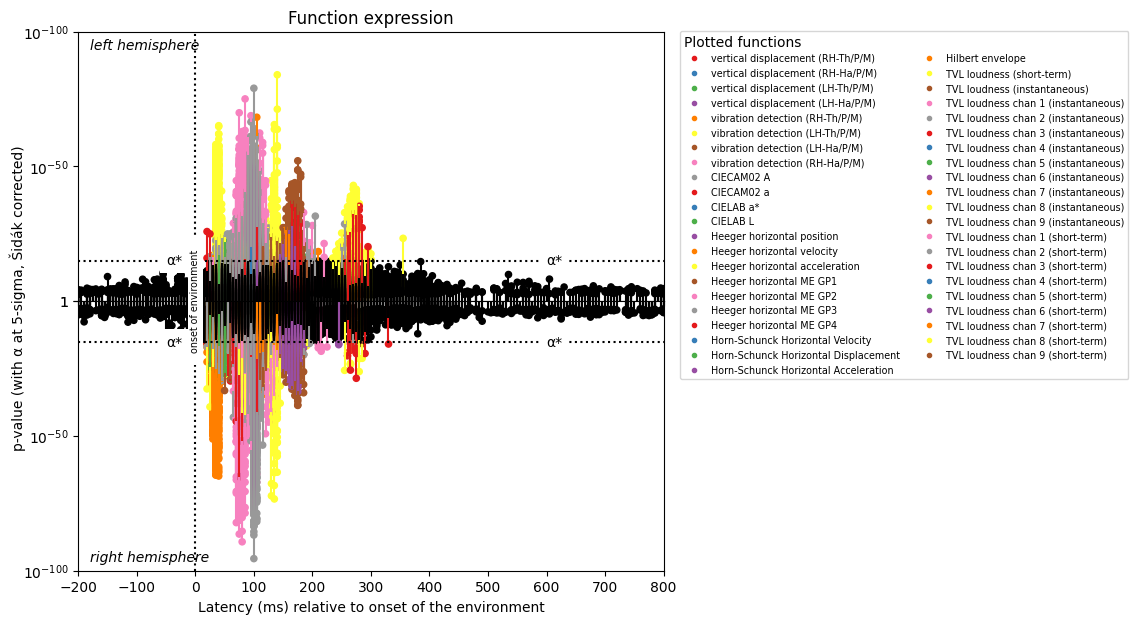

In [3]:
# plot everything, with everything model selected against each other
expression_plot(expression_data_kymata_mirror);

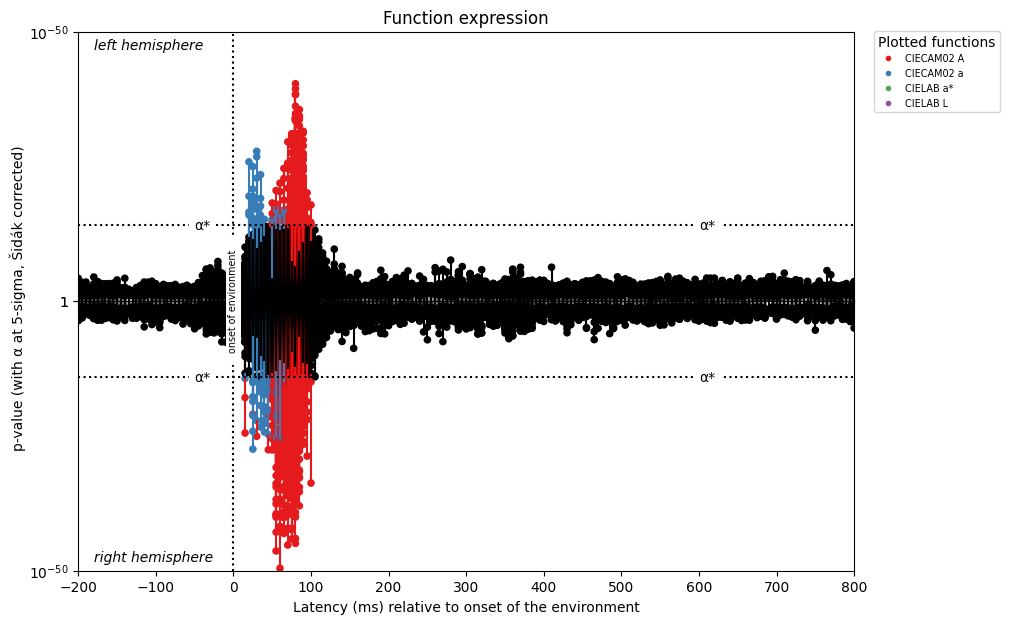

In [4]:
# only compare a subset of transforms (e.g. colour transforms), and print them all.
# Note that 'CIELAB a*' and 'CIELAB L' are not significant, and so will not turn up.
expression_plot(expression_data_kymata_mirror[
                    'CIECAM02 A',
                    'CIECAM02 a',
                    'CIELAB a*',
                    'CIELAB L'
                ]);

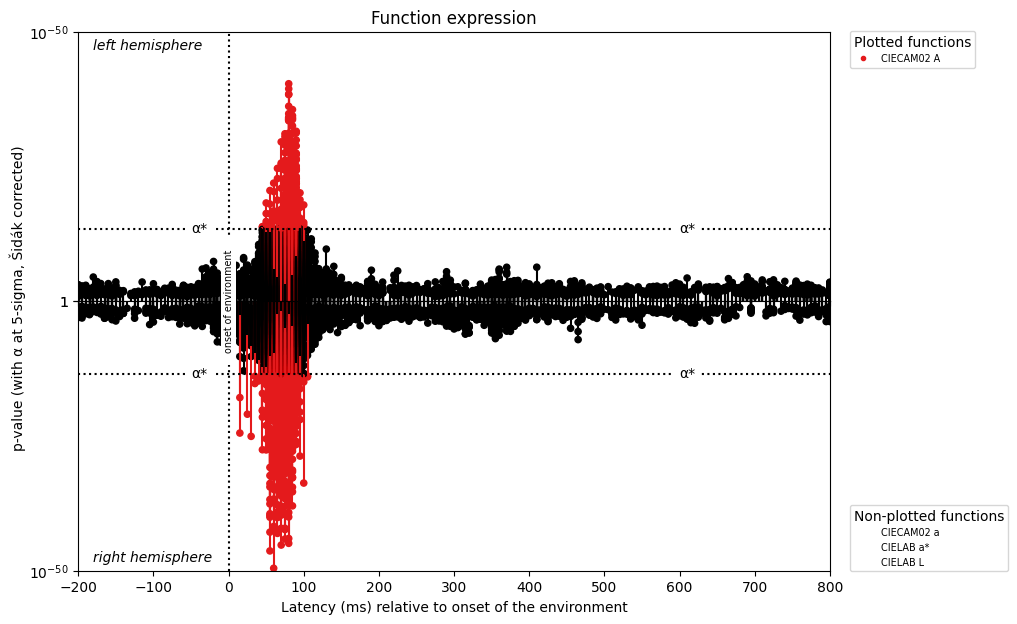

In [5]:
# Only compare a subset of transforms, and print just one of them
expression_plot(expression_data_kymata_mirror[
                    'CIECAM02 A',
                    'CIECAM02 a',
                    'CIELAB a*',
                    'CIELAB L'
                ], show_only=[
                    "CIECAM02 A"
                ]);

Data root set at /Users/cai/Dox/Work/Kymata lab/Code/kymata-core/kymata-core-data.
Consider setting this as environmental variable KYMATA_DATA_ROOT to ensure it's reused next time.
Hint: $> KYMATA_DATA_ROOT="/Users/cai/Dox/Work/Kymata lab/Code/kymata-core/kymata-core-data"
0 files missing from root.txt in /Users/cai/Dox/Work/Kymata lab/Code/kymata-core/kymata-core-data/tutorial_nkg_data/fsaverage
0 files missing from bem.txt in /Users/cai/Dox/Work/Kymata lab/Code/kymata-core/kymata-core-data/tutorial_nkg_data/fsaverage/fsaverage


/Users/cai/Dox/Work/Kymata lab/Code/kymata-core/kymata/plot/plot.py:295: UserWarning: Plotting on the fsaverage brain. Ensure that hexel numbers match those of the fsaverage brain.
  warn(


Using pyvistaqt 3d backend.
For automatic theme detection, "darkdetect" has to be installed! You can install it with `pip install darkdetect`
For automatic theme detection, "darkdetect" has to be installed! You can install it with `pip install darkdetect`
For automatic theme detection, "darkdetect" has to be installed! You can install it with `pip install darkdetect`
For automatic theme detection, "darkdetect" has to be installed! You can install it with `pip install darkdetect`
For automatic theme detection, "darkdetect" has to be installed! You can install it with `pip install darkdetect`
For automatic theme detection, "darkdetect" has to be installed! You can install it with `pip install darkdetect`
For automatic theme detection, "darkdetect" has to be installed! You can install it with `pip install darkdetect`
For automatic theme detection, "darkdetect" has to be installed! You can install it with `pip install darkdetect`


2024-10-25 14:35:39.651 python[15320:12761602] +[IMKClient subclass]: chose IMKClient_Legacy
2024-10-25 14:35:39.651 python[15320:12761602] +[IMKInputSession subclass]: chose IMKInputSession_Legacy


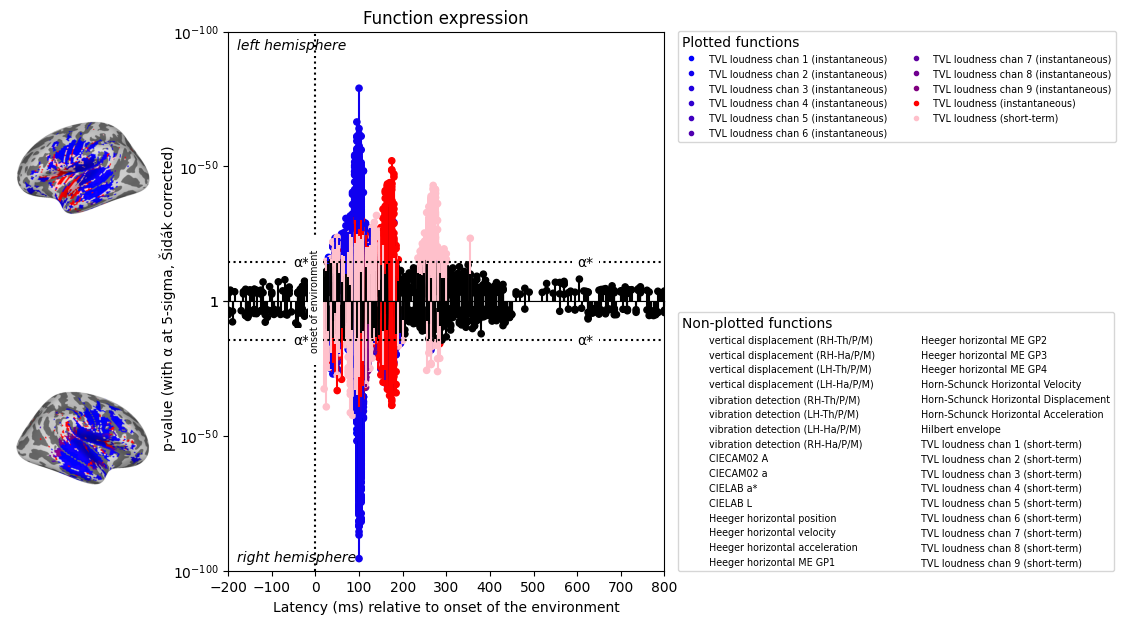

In [6]:
# If plotting hexel data, we can choose to display significant hexels' locations on a brain
expression_plot(expression_data_kymata_mirror,
                show_only=[
                    'TVL loudness chan 1 (instantaneous)',
                    'TVL loudness chan 2 (instantaneous)',
                    'TVL loudness chan 3 (instantaneous)',
                    'TVL loudness chan 4 (instantaneous)',
                    'TVL loudness chan 5 (instantaneous)',
                    'TVL loudness chan 6 (instantaneous)',
                    'TVL loudness chan 7 (instantaneous)',
                    'TVL loudness chan 8 (instantaneous)',
                    'TVL loudness chan 9 (instantaneous)',
                    'TVL loudness (instantaneous)',
                    'TVL loudness (short-term)',

                ],
                color=gradient_color_dict([
                    'TVL loudness chan 1 (instantaneous)',
                    'TVL loudness chan 2 (instantaneous)',
                    'TVL loudness chan 3 (instantaneous)',
                    'TVL loudness chan 4 (instantaneous)',
                    'TVL loudness chan 5 (instantaneous)',
                    'TVL loudness chan 6 (instantaneous)',
                    'TVL loudness chan 7 (instantaneous)',
                    'TVL loudness chan 8 (instantaneous)',
                    'TVL loudness chan 9 (instantaneous)',
                    ], start_color="blue", stop_color="purple")
                | constant_color_dict([
                    'TVL loudness (instantaneous)',
                ], color="red")
                | constant_color_dict([
                    'TVL loudness (short-term)',
                ], color="pink"),
                minimap=True,
                )

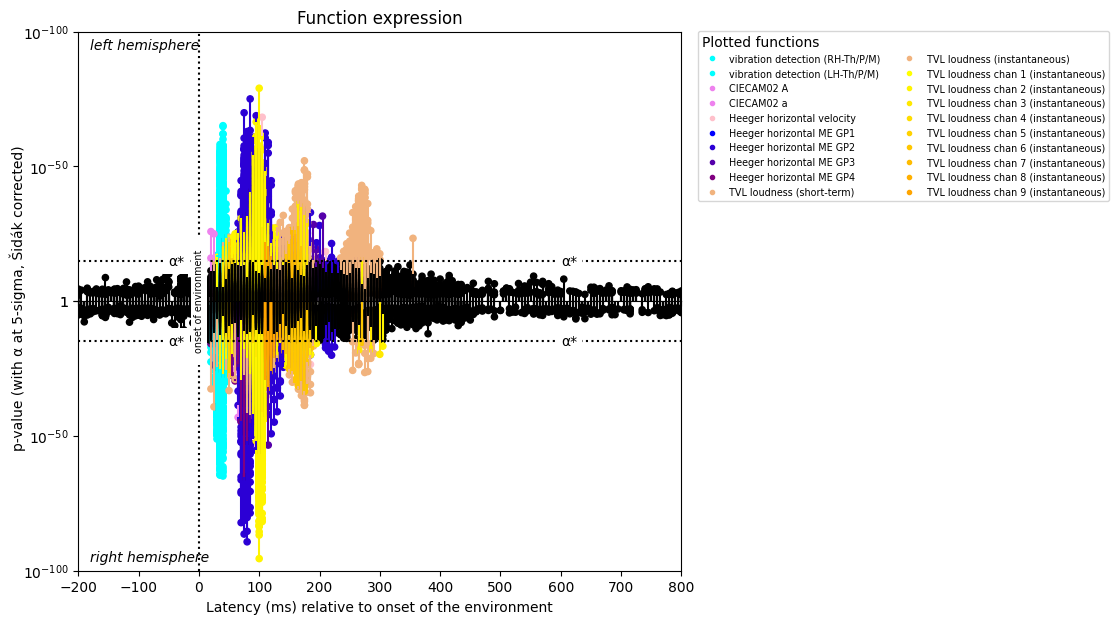

In [7]:
# Override colours (using hexcodes) so that all touch are cyan, all hearing orange, and all visual purple
expression_plot(expression_data_kymata_mirror[
                    'vibration detection (RH-Th/P/M)',
                    'vibration detection (LH-Th/P/M)',
                    'CIECAM02 A',
                    'CIECAM02 a',
                    'Heeger horizontal velocity',
                    'Heeger horizontal ME GP1',
                    'Heeger horizontal ME GP2',
                    'Heeger horizontal ME GP3',
                    'Heeger horizontal ME GP4',
                    'TVL loudness (short-term)', 
                    'TVL loudness (instantaneous)', 
                    'TVL loudness chan 1 (instantaneous)', 
                    'TVL loudness chan 2 (instantaneous)', 
                    'TVL loudness chan 3 (instantaneous)', 
                    'TVL loudness chan 4 (instantaneous)', 
                    'TVL loudness chan 5 (instantaneous)', 
                    'TVL loudness chan 6 (instantaneous)', 
                    'TVL loudness chan 7 (instantaneous)',
                    'TVL loudness chan 8 (instantaneous)',
                    'TVL loudness chan 9 (instantaneous)',
                ],
                # Supply colours in a dictionary mapping transform names to colour hexes.
                # You can use the two helper transforms constant_color_dict and gradient_color_dict to visually group transforms belonging
                # to the same family.  For example, here we set both vibration transforms to be cyan
                color = constant_color_dict([
                            'vibration detection (RH-Th/P/M)',
                            'vibration detection (LH-Th/P/M)',
                        ], color="cyan")
                        | constant_color_dict([
                            'CIECAM02 A',
                            'CIECAM02 a',
                        ], color="violet")
                        | {
                            'Heeger horizontal velocity': 'pink',
                        }
                        # and here we plot the 4 consecutive layers of a Gaussian pyramid using a colour gradient
                        | gradient_color_dict([
                            'Heeger horizontal ME GP1',
                            'Heeger horizontal ME GP2',
                            'Heeger horizontal ME GP3',
                            'Heeger horizontal ME GP4',
                        ], start_color="blue", stop_color="purple")
                        | {
                            'TVL loudness (short-term)': '#f1b37e',
                            'TVL loudness (instantaneous)': '#f1b37e',
                        }
                        | gradient_color_dict([
                            'TVL loudness chan 1 (instantaneous)',
                            'TVL loudness chan 2 (instantaneous)',
                            'TVL loudness chan 3 (instantaneous)',
                            'TVL loudness chan 4 (instantaneous)',
                            'TVL loudness chan 5 (instantaneous)',
                            'TVL loudness chan 6 (instantaneous)',
                            'TVL loudness chan 7 (instantaneous)',
                            'TVL loudness chan 8 (instantaneous)',
                            'TVL loudness chan 9 (instantaneous)',
                        ], start_color="yellow", stop_color="orange"));

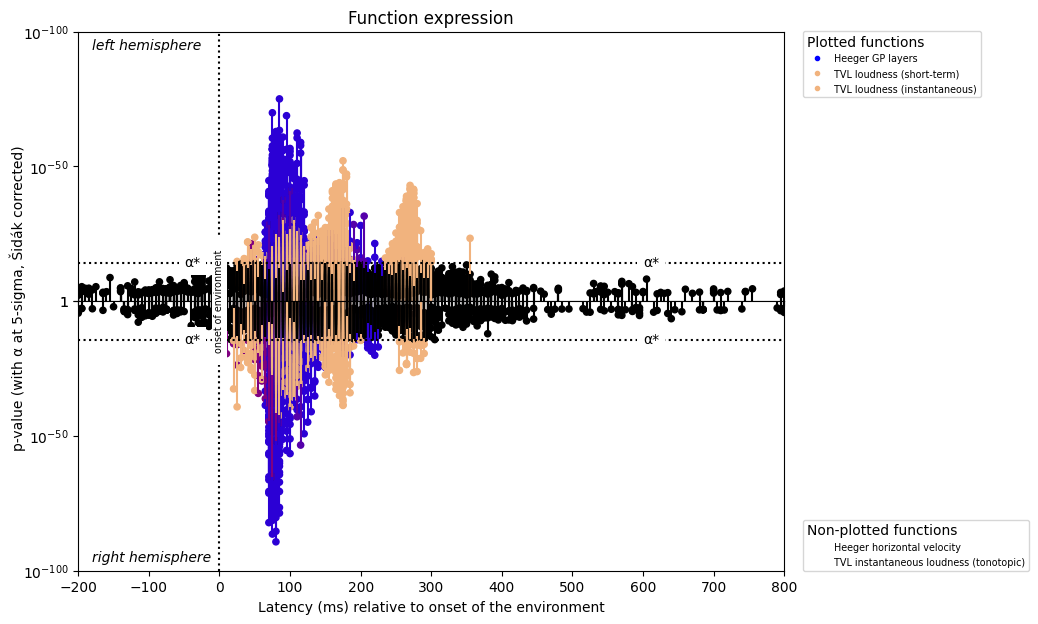

In [8]:
# We can group multiple transforms into single entries in the legend
heeger_gp_layers = [
    'Heeger horizontal ME GP1',
    'Heeger horizontal ME GP2',
    'Heeger horizontal ME GP3',
    'Heeger horizontal ME GP4',
]
tvl_tonotopic_layers = [
    'TVL loudness chan 1 (instantaneous)', 
    'TVL loudness chan 2 (instantaneous)', 
    'TVL loudness chan 3 (instantaneous)', 
    'TVL loudness chan 4 (instantaneous)', 
    'TVL loudness chan 5 (instantaneous)', 
    'TVL loudness chan 6 (instantaneous)', 
    'TVL loudness chan 7 (instantaneous)',
    'TVL loudness chan 8 (instantaneous)',
    'TVL loudness chan 9 (instantaneous)',
]
fig = expression_plot(expression_data_kymata_mirror[
                    'Heeger horizontal velocity',
                    'Heeger horizontal ME GP1',
                    'Heeger horizontal ME GP2',
                    'Heeger horizontal ME GP3',
                    'Heeger horizontal ME GP4',
                    'TVL loudness (short-term)', 
                    'TVL loudness (instantaneous)', 
                    'TVL loudness chan 1 (instantaneous)', 
                    'TVL loudness chan 2 (instantaneous)', 
                    'TVL loudness chan 3 (instantaneous)', 
                    'TVL loudness chan 4 (instantaneous)', 
                    'TVL loudness chan 5 (instantaneous)', 
                    'TVL loudness chan 6 (instantaneous)', 
                    'TVL loudness chan 7 (instantaneous)',
                    'TVL loudness chan 8 (instantaneous)',
                    'TVL loudness chan 9 (instantaneous)',
                ],
                show_only=heeger_gp_layers + ['TVL loudness (short-term)', 'TVL loudness (instantaneous)'],
                color = gradient_color_dict(heeger_gp_layers, start_color="blue", stop_color="purple")
                        | {
                            'TVL loudness (short-term)': '#f1b37e',
                            'TVL loudness (instantaneous)': '#f1b37e',
                        },
                legend_display=legend_display_dict(heeger_gp_layers, "Heeger GP layers")
                               | legend_display_dict(tvl_tonotopic_layers, "TVL instantaneous loudness (tonotopic)"))

### Plot sensor expression plots

Data root set at /Users/cai/Dox/Work/Kymata lab/Code/kymata-core/kymata-core-data.
Consider setting this as environmental variable KYMATA_DATA_ROOT to ensure it's reused next time.
Hint: $> KYMATA_DATA_ROOT="/Users/cai/Dox/Work/Kymata lab/Code/kymata-core/kymata-core-data"
Local file already exists: /Users/cai/Dox/Work/Kymata lab/Code/kymata-core/kymata-core-data/tutorial_nkg_data/TVL_2020_delta_ins_tontop_chan1_loudness_only_sensors/TVL_2020_delta_ins_tontop_chan1_loudness_only_sensors.nkg


/Users/cai/Dox/Work/Kymata lab/Code/kymata-core/kymata/io/nkg.py:231: UserWarning: This file uses an old format. Please consider re-saving the data to avoid future incompatibility.
  warn(


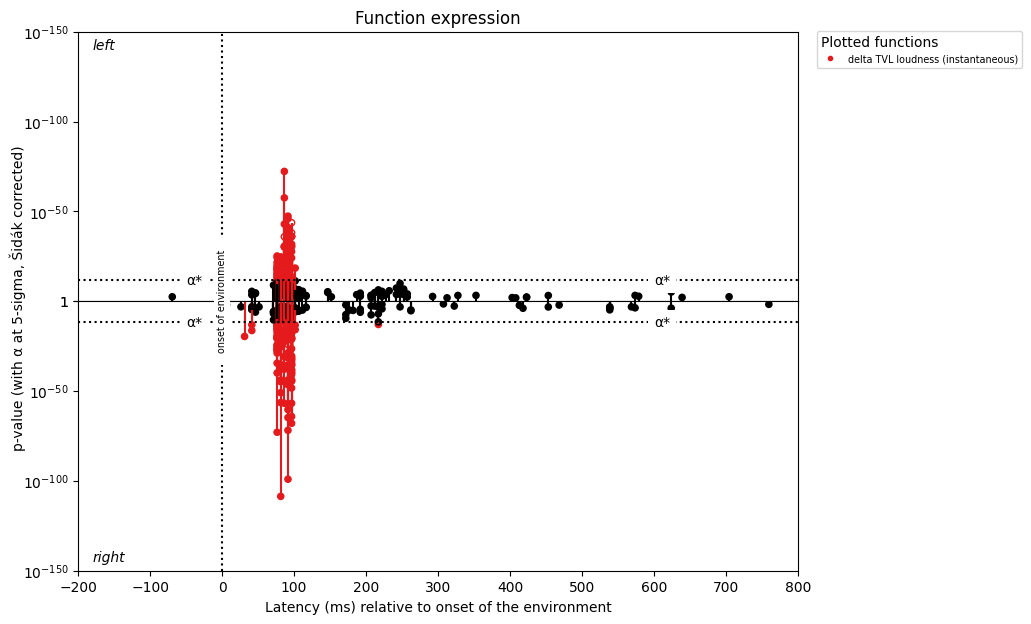

In [9]:
expression_data_TVL_ins_loudness_TC1_sensors: SensorExpressionSet = TVLDeltaInsTC1LoudnessOnlySensorsDataset().to_expressionset()
expression_plot(expression_data_TVL_ins_loudness_TC1_sensors);

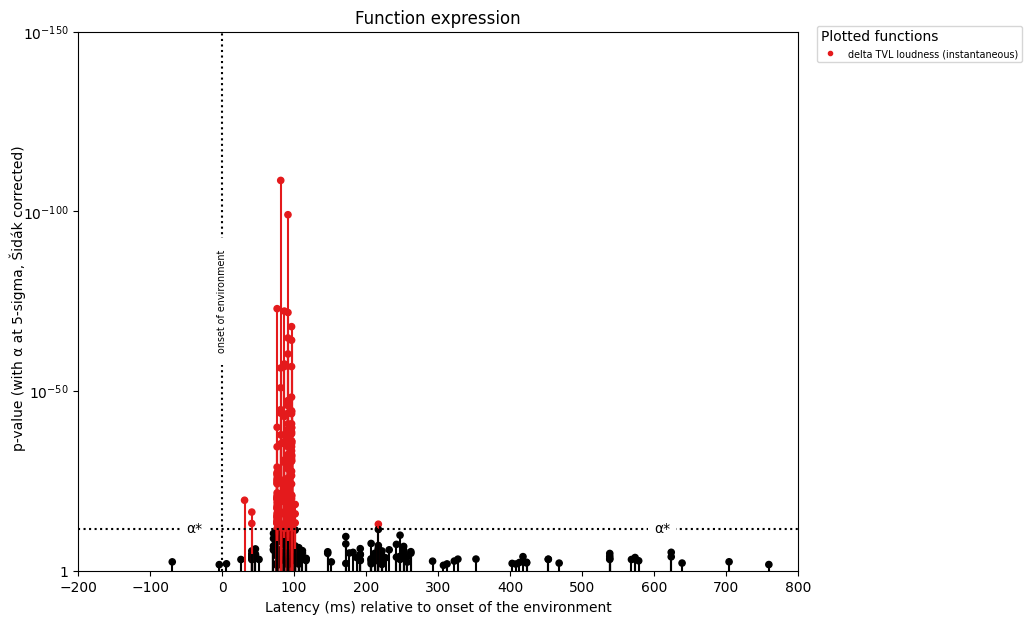

In [10]:
# With sensor data we can also plot all sensors pointing in the same direction if we don't wish to
# distinguish between left and right sensors
expression_plot(expression_data_TVL_ins_loudness_TC1_sensors, paired_axes=False);